In [2]:
import numpy                          as np
import matplotlib.pyplot              as plt

# import plons scripts
import plons.LoadSetup                as stp
import plons.LoadDump                 as dmp
import plons.SmoothingKernelScript    as sk
import plons.ConversionFactors_cgs    as cgs

In [3]:
prefix = "wind"
loc = "/STER/matse/Papers/Esseldeurs+2023/Phantom/High/binary6Lucy/"
outputloc = "."
phantom_dir = "/home/matse/codes/phantom/"

In [4]:
setup     = stp.LoadSetup(loc, prefix)

In [4]:
dumpData  = dmp.LoadDump_cgs(dump, setup, phantom_dir)

In [6]:
n = 200
x = np.linspace(-30*cgs.au, 30*cgs.au, n)
y = np.linspace(-30*cgs.au, 30*cgs.au, n)
X, Y = np.meshgrid(x, y)
Z    = np.zeros_like(X)

In [ ]:
smooth = sk.smoothMesh(X, Y, Z, dumpData, ['rho', 'Tgas', 'speed'])

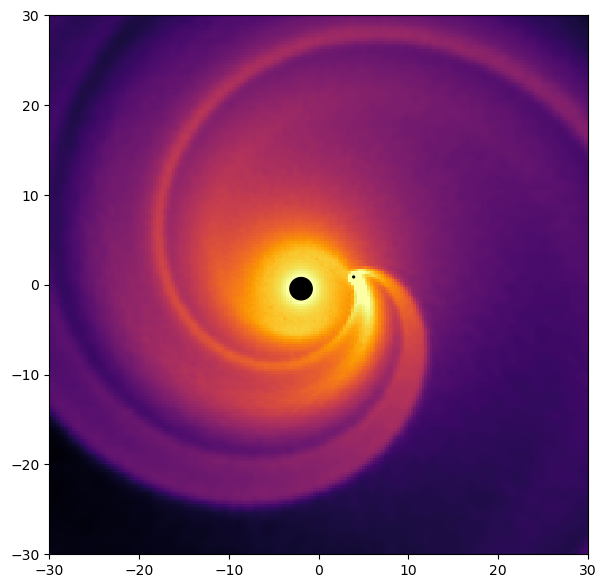

In [7]:
fig, ax = plt.subplots(1, figsize=(7, 7))

ax.set_aspect('equal')
ax.set_facecolor('k')

ax.pcolormesh(X/cgs.au, Y/cgs.au, np.log10(smooth["rho"]+1e-99), cmap=plt.cm.get_cmap('inferno'), vmin=-17, vmax = -14)
ax.set_xlim(x[0]/cgs.au, x[-1]/cgs.au)
ax.set_ylim(y[0]/cgs.au, y[-1]/cgs.au)

circleAGB = plt.Circle(dumpData['posAGB']/cgs.au, setup["wind_inject_radius"], transform=ax.transData._b, color="black", zorder=10)
ax.add_artist(circleAGB)
circleComp = plt.Circle(dumpData['posComp']/cgs.au, setup["rAccrComp"], transform=ax.transData._b, color="black", zorder=10)
ax.add_artist(circleComp)

plt.show()